In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
infile = "C:\\Users\\LuizF\\Google Drive\\Python\\doctorate-master\\AtmospherePhysics\\Database\\"
#filename = "2021010100.txt"

def DataPrepare(infile):
    with open(infile) as f:
        file = f.read()

    file = file[file.find('Selected output parameters'):]

    start = file.find('1   ')

    body = file[start:]

    extract_out = []

    for elem in body.split('\n')[1:]:

        extract = []
        extract_out.append(extract)
        for i in elem.split('  ')[1:]:
            extract.append(float(i.strip()))

    df = pd.DataFrame(extract_out[:-1])

    df.columns = ['alt', 'O', 'N2', 'O2', 'T']

    df['M'] = df['N2'] + df['O2'] 
    return df

def plot_results(emission, altitude, title_name = 'OI 5577', save = False):
    
    fig, ax = plt.subplots(figsize = (5, 8))

    sns.set_style("whitegrid")

    args = dict(fillstyle = 'none', markersize = 6, lw = 1.0)
    
    ax.plot(emission, altitude, marker = '^', **args)
    
    if title_name == 'OI 6300':
        title = f'Emissão volumétrica do {title_name} \n na ionosfera'
        ylim = [150, 400]
    else:
        title = f'Emissão volumétrica do {title_name} \n na região do MLT'
        ylim = [80, 120]

    ax.set(ylim = ylim, 
           ylabel = 'Altitude (km)', 
           xlabel = 'Taxa de emissão volumétrica (fótons/$cm^{3} s$)', 
           title = title)
    
    peak = altitude[np.argmax(emission)]
    
    ax.axhline(peak, color='black', 
               linestyle=':', lw = 1.5, 
               label = f'Pico de emissão \n em {peak} km ')

    ax.legend(loc = 'upper right')
    ax.grid(True)
    
    plt.rcParams.update({'font.size': 14})   
    
    path_out = "C:\\Users\\LuizF\\Google Drive\\Doutorado\\Modelos_Latex_INPE\\docs\\AtmospherePhysics\\Figuras\\TakaImages\\"
    
    if title_name == 'OI 5577' or title_name == 'OI 6300':
        
        FigureName = title_name.replace(' ', '') + '.png'
    else:
        FigureName = title_name[:4].replace('$', '').replace('(', '') + '.png'
        
    
    print(FigureName)
    
    if save:
        plt.savefig(path_out + FigureName, dpi = 100, bbox_inches="tight")
    

    plt.show()


def PrepareIRI(infile, filename):

    df = pd.read_csv(infile + filename, header = None, delim_whitespace = True) 
    
    df.columns = ['alt', 'ne', 'tn', 'ti', 'O+', 'O2+']

    df['ne'] = df['ne'] / 1e6

    df['O+'] = df['ne'] * df['O+'] 

    df['O2+'] = df['ne'] * df['O2+']

    return df

# Emission Rate OI 5577

\begin{equation}
V_{5577} = \frac{A_{55} k_1 [O]^3 [M]}{\left(A_{15} + k_5[O_2]\right)\left(15[O_2] + 211[O]\right)}
\end{equation}

OI5577.png


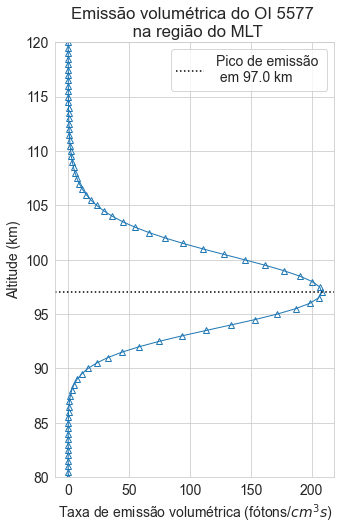

In [4]:
df = DataPrepare(infile + '2021010100.txt')

A55 =  1.18
A6 = 1.35
k5 = 4e-12*np.exp(-865/df['T'])
k1 = 4.7e-33*pow(300/df['T'], 2)

V5577 = ((A55 * k1 * df['O']**3 * df['M']) 
         / ((A6 + k5*df['O2']) * (15*df['O2'] + 211*df['O'])))

altitude = df['alt'].values

plot_results(V5577, altitude, save = True)



# Emission rate of $O_2 (b^1 \Sigma_g^+)$

\begin{equation}
V_{O_2} = \frac{k_1 [O]^2 [M] A_1}{A_2 + k_2^{O_2}[O_2] + k_2^{N_2}[N_2] + k_2^{O}[O]}
\end{equation}

Vargas2007; McDade1986

O_2.png


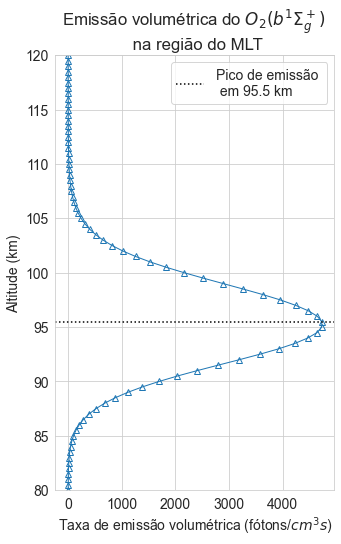

In [5]:
A1 = 0.079 #s^-1
A2 = 0.083 #s^-1
k2_O2 = 4e-17 #cm^3 s^-1
k2_N2 = 2.2e-15 #cm^3 s^-1
k2_O = 8e-14 #cm^3 s^-1
k1 = 4.7e-33*(300/df['T'])**2

Q1 = A2 + k2_O2 * df['O2'] + k2_N2 * df['N2'] +  k2_O * df['O']


VO2 = ((A1 * k1 * df['O']**2 *df['O2'] * df['M']) / (Q1 * (7.5 * df['O2'] + 33 * df['O']))) 

plot_results(VO2, altitude, title_name = '$O_2 (b^1 \Sigma_g^+)$', save = True)

# Emission rate OH (8,3)

\begin{equation}
V_{OH(8,3)} = \frac{A_{83} [O] [O_2][M]\left[\beta_8 \left(\tau^{-1}_Q + \tau_9^{-1} + A_{98} \beta_9\right)\right]}{(\tau^{-1}_Q + \tau_8^{-1}) (\tau^{-1}_Q + \tau_9^{-1})}
\end{equation}

Takahashi1981

OH.png


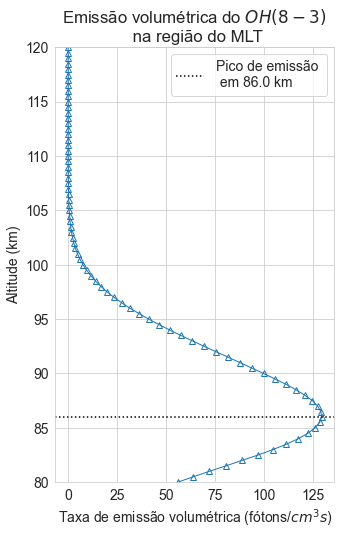

In [6]:
f8 = 0.29
k6_O2 = 5.96e-34*(300/df['T'])**(2.37)
k6_N2 = 5.7e-34*(300/df['T'])**(2.62)

#VOH = (A_83 * f8 * df['O'] * df['O2'] * (k6_O2 * df['O2'] + k6_N2*df['N2']) / 
#      (260 + 2e11*df['O2']))

B8 = 0.29
B9 = 0.54
A83 = 0.0296
A98 = 2.64
t8 = 13.5
t9 = 15.6
k13 = 8.2e-35 * np.exp(445 / df['T'])
k16 = 1e-14
k17 = 3.6e-15
k12 = 4e-11

tq = k12 * df['O'] + k16 *df['O2'] + k17 * df['N2']

VOH = (A83 * k13 * df['O'] * df['O2'] * df['M'] * (B8*(tq + t9) + A98*B9) 
       / ((tq + t8) * (tq + t9)))



plot_results(VOH, altitude, title_name = '$OH(8-3)$', save = True)

OH.png


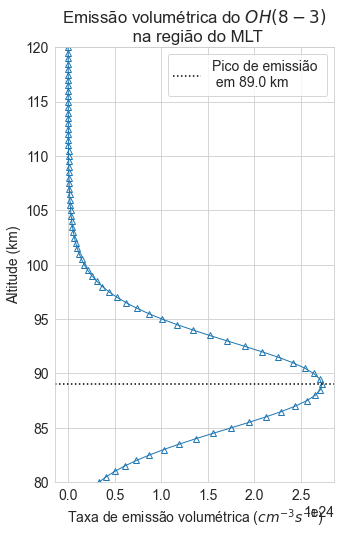

In [96]:
A = 1.4e-10
R6 = 0.27 *A* np.exp(-470 / df['T'])
R8 = 0.569
R9 = 2.5e-10
R10 = 8.0e-12
R11 = 7.0e-13

VOH2 = ((R8 * R6 * df['O'] * df['O2'] * df['M']) 
        / (R8 + R9 * df['O'] + R10 * df['O2'] + R11 * df['N2']))

plot_results(VOH2, altitude, title_name = '$OH(8-3)$', save = False)

# Emission rate OI 6300

OI6300.png


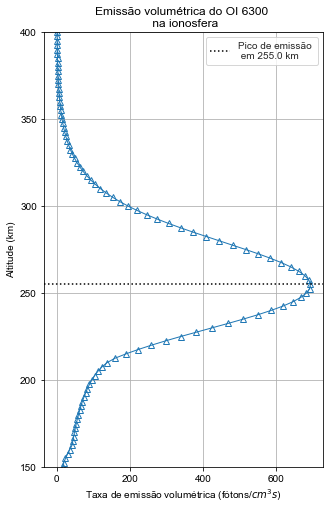

In [6]:
df = DataPrepare(infile + '2021010100msis90.txt')

df = df.loc[df['alt'] >= 100, :].reset_index()

filename = '2021010100iri2016.txt'

iri = PrepareIRI(infile, filename)


AD = 7.45e-3
k1 = 2.3e-11
k4 = 3.2e-11
k7 = 7.45e-3

#Sobral

fD = 1.1
AD = 7.45e-3
A63 = 5.63e-3
k2 = 2.3e-11
k3 = 1.06e-11
k5 = 3.2e-11
k6 = 6.6e-10
k7 = 9.2e-13
k7 = 0

V6300 = ((0.756 * fD * k3 * df['O2'] * iri['ne']) 
         / (AD + k2 * df['N2'] + k5 * df['O2'] + k6 * iri['ne'] + k7 * df['O'] ))

altitude = df['alt'].values

step = 5

plot_results(V6300[::step], altitude[::step], title_name = 'OI 6300', save = False)


\begin{equation}
V_{6300} = \frac{f({}^1D) k_1 [O_2] [e] A_{63}}{A({}^1 D) + k_3 [N_2] + k_4 [O_2] + k_5[O] + k_6[e]}
\end{equation}

OI6300.png


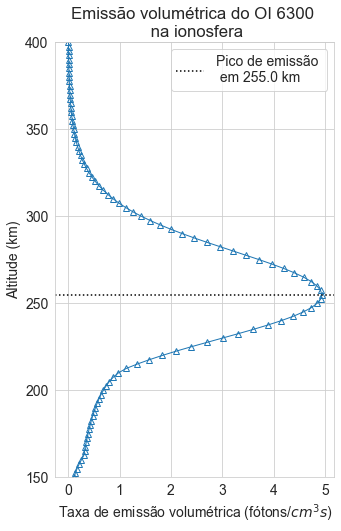

In [7]:

df = DataPrepare(infile + '2021010100msis90.txt')

df = df.loc[df['alt'] >= 100, :].reset_index()

filename = '2021010100iri2016.txt'

iri = PrepareIRI(infile, filename)




fD = 1.1
AD = 7.45e-3  # /s
A63 = 5.63e-3 # /s
#k2 = 2.3e-11
k3 = 2.3e-11 # /s
k5 = 9.2e-13
k6 = 6.6e-10
k1 = 1.06e-11 # /cm^3 s^1


V6300 = ((fD * k1 * df['O2'] * iri['ne'] * A63) 
         / (AD + k3*df['N2'] + k4*df['O2'] + k6*iri['ne'] + k5*df['O']))

altitude = df['alt'].values

step = 5

plot_results(V6300[::step], altitude[::step], title_name = 'OI 6300', save = True)

In [10]:
iri[110:]

,alt,ne,tn,ti,O+,O2+
110,155.0,962.16,607.9,607.9,192.432,2982.696
111,155.5,1007.60,609.8,609.8,302.280,3325.080
112,156.0,1054.90,611.7,611.7,316.470,3692.150
113,156.5,1104.20,613.6,613.6,331.260,4085.540
114,157.0,1155.30,615.4,615.4,346.590,4505.670
...,...,...,...,...,...,...
796,498.0,86185.00,718.8,874.9,6817233.500,0.000
797,498.5,85873.00,718.8,874.9,6775379.700,0.000
798,499.0,85563.00,718.8,874.9,6733808.100,0.000
799,499.5,85254.00,718.8,875.0,6700964.400,0.000
